# Lab Program 4

## Fourier Transform

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(563, 750, 3)


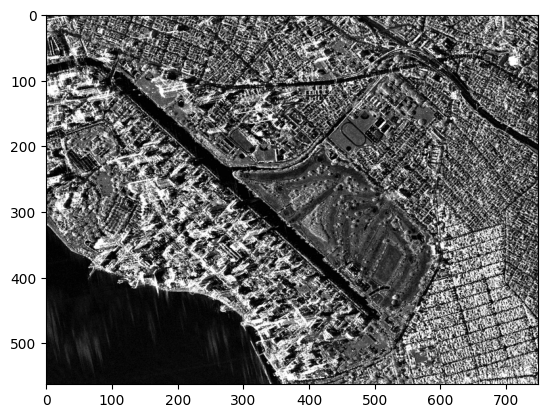

In [3]:
# Loading the image.
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/lab-4-image.png")
plt.imshow(image)
print(image.shape)

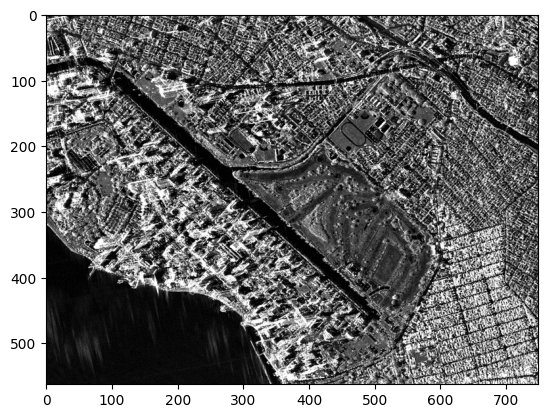

In [4]:
# Converting image into grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")



In [5]:
# Normalizing the image.
normalized_image = gray / 255.0

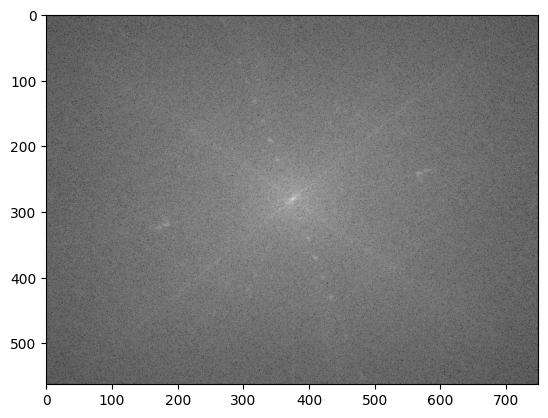

In [6]:
# Taking the Fourier transform of the normalized image.
f = np.fft.fft2(normalized_image)
fshift = np.fft.fftshift(f)
# Taking the logarithm of the Fourier transformed image.
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap="gray")

## Idea Low Pass filter

In [7]:
def ideal_low_pass_filter(shape, cutoff):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # center
  mask = np.zeros((rows, cols), np.uint8)
  mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
  return mask

Ideal High Pass Filter

In [8]:
def ideal_high_pass_filter(shape, cutoff):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # center
  mask = np.ones((rows, cols), np.uint8)
  mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
  return mask

ButterWorth Low Pass Filter

In [9]:
def butterworth_low_pass_filter(shape, cutoff, n=2):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # center
  mask = np.zeros((rows, cols), np.float32)
  for i in range(rows):
    for j in range(cols):
      distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
      mask[i, j] = 1 / (1 + (distance / cutoff) ** (2 * n))
  return mask

Butter Worth High Pass Fiter

In [10]:
def butterworth_high_pass_filter(shape, cutoff, n=2):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2
  mask = np.ones((rows, cols), np.float32)
  for i in range(rows):
    for j in range(cols):
      distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
      mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * n))
  return mask

Gaussian Low Pass Filter

In [11]:
def gaussian_low_pass_filter(shape, cutoff):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # center
  mask = np.zeros((rows, cols), np.float32)
  for i in range(rows):
    for j in range(cols):
      distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
      mask[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
  return mask

Gaussian High Pass Filter

In [12]:
def gaussian_high_pass_filter(shape, cutoff):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # center
  mask = np.zeros((rows, cols), np.float32)
  for i in range(rows):
    for j in range(cols):
      # Calculate the distance from the center
      distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
      mask[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
  return mask

Impact of Filter Radius

In [13]:
# This function is written to apply the filters and to visualize the impact.
def apply_filter_and_visualize(filter_func, cutoff_radius, title):
  mask = filter_func(magnitude_spectrum.shape, cutoff_radius)
  fshift_filtered = fshift * mask
  f_ishift = np.fft.ifftshift(fshift_filtered)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.abs(img_back)

  plt.figure(figsize=(12, 6))

  plt.subplot(131)
  plt.imshow(mask, cmap='gray')
  plt.title('Filter Mask')

  plt.subplot(132)
  plt.imshow(20 * np.log(np.abs(fshift_filtered)), cmap='gray')
  plt.title('Filtered Frequency Domain')

  plt.subplot(133)
  plt.imshow(img_back, cmap='gray')
  plt.title(f'{title} (Cutoff: {cutoff_radius})')

  plt.show()

# Impact of filter radius for Ideal Low Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(ideal_low_pass_filter, cutoff_radius, 'Ideal Low Pass Filter')

# Impact of filter radius for Ideal High Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(ideal_high_pass_filter, cutoff_radius, 'Ideal High Pass Filter')

# Impact of filter radius for Butterworth Low Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(butterworth_low_pass_filter, cutoff_radius, 'Butterworth Low Pass Filter')

# Impact of filter radius for Butterworth High Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(butterworth_high_pass_filter, cutoff_radius, 'Butterworth High Pass Filter')

# Impact of filter radius for Gaussian Low Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(gaussian_low_pass_filter, cutoff_radius, 'Gaussian Low Pass Filter')

# Impact of filter radius for Gaussian High Pass Filter
for cutoff_radius in [10, 30, 50]:
  apply_filter_and_visualize(gaussian_high_pass_filter, cutoff_radius, 'Gaussian High Pass Filter')

Output hidden; open in https://colab.research.google.com to view.

Each filter was applied to the Fourier Transform of the image by multiplying it with the corresponding filter mask.

The filtered image in the frequency domain was then transformed back to the spatial domain using the inverse Fourier Transform.

For each filter type and cutoff radius, the filter mask, the filtered image in the frequency domain, and the final filtered image in the spatial domain were displayed.

## Results and Observations

The output demonstrates how different filters and cutoff radii affect the satellite image. Key observations include:

* **Low-Pass Filters:**
    * As the cutoff radius increases, more low-frequency components pass through, producing a smoother image with reduced detail.
    * Ideal Low-Pass and Butterworth Low-Pass filters show sharper transitions, often leading to artifacts like ringing, whereas Gaussian Low-Pass filters provide smoother transitions and minimize these artifacts.
    
* **High-Pass Filters:**
    * Increasing the cutoff radius in high-pass filters removes more low-frequency components, highlighting high-frequency details such as edges and noise.
    * Ideal and Butterworth High-Pass filters tend to introduce significant ringing, while Gaussian High-Pass filters offer cleaner results by gradually removing low frequencies.
    
* **Impact of Cutoff Radius:**
    * The cutoff radius determines which frequency components pass through the filter. A smaller radius results in stronger filtering, reducing noise and detail, while a larger radius retains more detail but may also preserve noise.
